In [106]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from xgboost import XGBRegressor
import tensorflow as tf
from tensorflow.keras import layers, models

In [7]:
# read the train FD001 data but specifying that white space is the seperator
df = pd.read_csv('/content/train_FD001.txt', sep=' ', header=None)
df.head()

,0,1,2,3,4,5,6,7,8,9,...,18,19,20,21,22,23,24,25,26,27
0,1,1,-0.0007,-0.0004,100.0,518.67,641.82,1589.70,1400.60,14.62,...,8138.62,8.4195,0.03,392,2388,100.0,39.06,23.4190,NaN,NaN
1,1,2,0.0019,-0.0003,100.0,518.67,642.15,1591.82,1403.14,14.62,...,8131.49,8.4318,0.03,392,2388,100.0,39.00,23.4236,NaN,NaN
2,1,3,-0.0043,0.0003,100.0,518.67,642.35,1587.99,1404.20,14.62,...,8133.23,8.4178,0.03,390,2388,100.0,38.95,23.3442,NaN,NaN
3,1,4,0.0007,0.0000,100.0,518.67,642.35,1582.79,1401.87,14.62,...,8133.83,8.3682,0.03,392,2388,100.0,38.88,23.3739,NaN,NaN
4,1,5,-0.0019,-0.0002,100.0,518.67,642.37,1582.85,1406.22,14.62,...,8133.80,8.4294,0.03,393,2388,100.0,38.90,23.4044,NaN,NaN


In [10]:
# assign column names for easier readability
columns = (
    ['unit number','time'] +
    [f"operational setting {num}" for num in range(1,4)]+
    [f"sensor measurement {num}" for num in range(1,24)]
    )
df.columns = columns

In [11]:
df

,unit number,time,operational setting 1,operational setting 2,operational setting 3,sensor measurement 1,sensor measurement 2,sensor measurement 3,sensor measurement 4,sensor measurement 5,...,sensor measurement 14,sensor measurement 15,sensor measurement 16,sensor measurement 17,sensor measurement 18,sensor measurement 19,sensor measurement 20,sensor measurement 21,sensor measurement 22,sensor measurement 23
0,1,1,-0.0007,-0.0004,100.0,518.67,641.82,1589.70,1400.60,14.62,...,8138.62,8.4195,0.03,392,2388,100.0,39.06,23.4190,NaN,NaN
1,1,2,0.0019,-0.0003,100.0,518.67,642.15,1591.82,1403.14,14.62,...,8131.49,8.4318,0.03,392,2388,100.0,39.00,23.4236,NaN,NaN
2,1,3,-0.0043,0.0003,100.0,518.67,642.35,1587.99,1404.20,14.62,...,8133.23,8.4178,0.03,390,2388,100.0,38.95,23.3442,NaN,NaN
3,1,4,0.0007,0.0000,100.0,518.67,642.35,1582.79,1401.87,14.62,...,8133.83,8.3682,0.03,392,2388,100.0,38.88,23.3739,NaN,NaN
4,1,5,-0.0019,-0.0002,100.0,518.67,642.37,1582.85,1406.22,14.62,...,8133.80,8.4294,0.03,393,2388,100.0,38.90,23.4044,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20626,100,196,-0.0004,-0.0003,100.0,518.67,643.49,1597.98,1428.63,14.62,...,8137.60,8.4956,0.03,397,2388,100.0,38.49,22.9735,NaN,NaN
20627,100,197,-0.0016,-0.0005,100.0,518.67,643.54,1604.50,1433.58,14.62,...,8136.50,8.5139,0.03,395,2388,100.0,38.30,23.1594,NaN,NaN
20628,100,198,0.0004,0.0000,100.0,518.67,643.42,1602.46,1428.18,14.62,...,8141.05,8.5646,0.03,398,2388,100.0,38.44,22.9333,NaN,NaN
20629,100,199,-0.0011,0.0003,100.0,518.67,643.23,1605.26,1426.53,14.62,...,8139.29,8.5389,0.03,395,2388,100.0,38.29,23.0640,NaN,NaN


In [12]:
# theres some nans in the last two columsn these need to be dropped
df = df.dropna(axis=1, how='all')
df.head()


,unit number,time,operational setting 1,operational setting 2,operational setting 3,sensor measurement 1,sensor measurement 2,sensor measurement 3,sensor measurement 4,sensor measurement 5,...,sensor measurement 12,sensor measurement 13,sensor measurement 14,sensor measurement 15,sensor measurement 16,sensor measurement 17,sensor measurement 18,sensor measurement 19,sensor measurement 20,sensor measurement 21
0,1,1,-0.0007,-0.0004,100.0,518.67,641.82,1589.70,1400.60,14.62,...,521.66,2388.02,8138.62,8.4195,0.03,392,2388,100.0,39.06,23.4190
1,1,2,0.0019,-0.0003,100.0,518.67,642.15,1591.82,1403.14,14.62,...,522.28,2388.07,8131.49,8.4318,0.03,392,2388,100.0,39.00,23.4236
2,1,3,-0.0043,0.0003,100.0,518.67,642.35,1587.99,1404.20,14.62,...,522.42,2388.03,8133.23,8.4178,0.03,390,2388,100.0,38.95,23.3442
3,1,4,0.0007,0.0000,100.0,518.67,642.35,1582.79,1401.87,14.62,...,522.86,2388.08,8133.83,8.3682,0.03,392,2388,100.0,38.88,23.3739
4,1,5,-0.0019,-0.0002,100.0,518.67,642.37,1582.85,1406.22,14.62,...,522.19,2388.04,8133.80,8.4294,0.03,393,2388,100.0,38.90,23.4044


In [14]:
# EDA
# check shape
df.shape

(20631, 26)

In [15]:
# check the number of units
df['unit number'].nunique()

100

In [17]:
# how long does eacg unit number run
df.groupby('unit number')['time'].max().describe()

,time
count,100.000000
mean,206.310000
std,46.342749
min,128.000000
25%,177.000000
50%,199.000000
75%,229.250000
max,362.000000


In [28]:
# create a target RUL
df = df.copy()

df['RUL'] = df.groupby('unit number')['time'].transform('max') - df['time']


In [29]:
df

,unit number,time,operational setting 1,operational setting 2,operational setting 3,sensor measurement 1,sensor measurement 2,sensor measurement 3,sensor measurement 4,sensor measurement 5,...,sensor measurement 13,sensor measurement 14,sensor measurement 15,sensor measurement 16,sensor measurement 17,sensor measurement 18,sensor measurement 19,sensor measurement 20,sensor measurement 21,RUL
0,1,1,-0.0007,-0.0004,100.0,518.67,641.82,1589.70,1400.60,14.62,...,2388.02,8138.62,8.4195,0.03,392,2388,100.0,39.06,23.4190,191
1,1,2,0.0019,-0.0003,100.0,518.67,642.15,1591.82,1403.14,14.62,...,2388.07,8131.49,8.4318,0.03,392,2388,100.0,39.00,23.4236,190
2,1,3,-0.0043,0.0003,100.0,518.67,642.35,1587.99,1404.20,14.62,...,2388.03,8133.23,8.4178,0.03,390,2388,100.0,38.95,23.3442,189
3,1,4,0.0007,0.0000,100.0,518.67,642.35,1582.79,1401.87,14.62,...,2388.08,8133.83,8.3682,0.03,392,2388,100.0,38.88,23.3739,188
4,1,5,-0.0019,-0.0002,100.0,518.67,642.37,1582.85,1406.22,14.62,...,2388.04,8133.80,8.4294,0.03,393,2388,100.0,38.90,23.4044,187
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20626,100,196,-0.0004,-0.0003,100.0,518.67,643.49,1597.98,1428.63,14.62,...,2388.26,8137.60,8.4956,0.03,397,2388,100.0,38.49,22.9735,4
20627,100,197,-0.0016,-0.0005,100.0,518.67,643.54,1604.50,1433.58,14.62,...,2388.22,8136.50,8.5139,0.03,395,2388,100.0,38.30,23.1594,3
20628,100,198,0.0004,0.0000,100.0,518.67,643.42,1602.46,1428.18,14.62,...,2388.24,8141.05,8.5646,0.03,398,2388,100.0,38.44,22.9333,2
20629,100,199,-0.0011,0.0003,100.0,518.67,643.23,1605.26,1426.53,14.62,...,2388.23,8139.29,8.5389,0.03,395,2388,100.0,38.29,23.0640,1


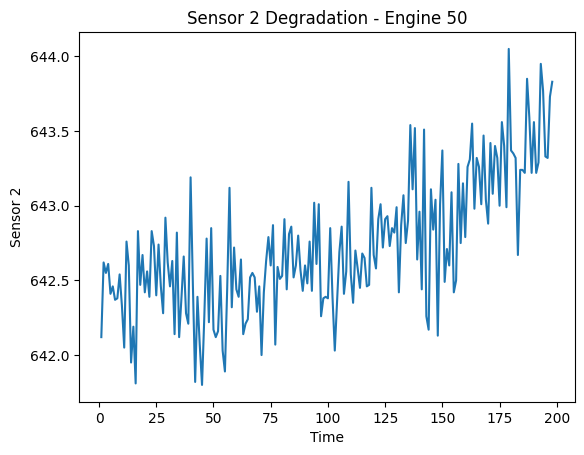

In [31]:
# plotting random degradation trajectories
engine_sample = df[df['unit number'] == 50]

plt.plot(engine_sample["time"], engine_sample["sensor measurement 2"])
plt.xlabel("Time")
plt.ylabel("Sensor 2")
plt.title("Sensor 2 Degradation - Engine 50")
plt.show()



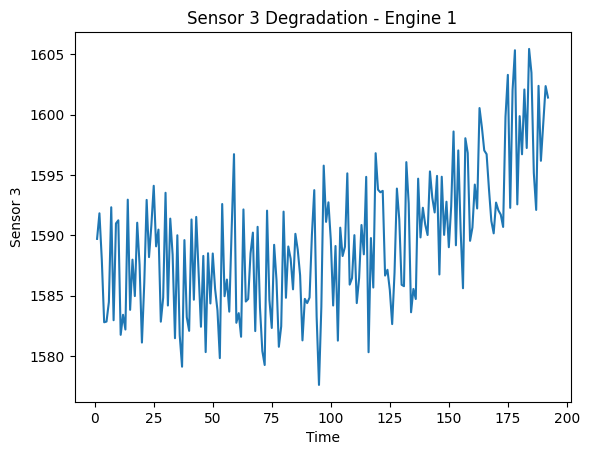

In [35]:
engine_sample = df[df['unit number'] == 1]

plt.plot(engine_sample["time"], engine_sample["sensor measurement 3"])
plt.xlabel("Time")
plt.ylabel("Sensor 3")
plt.title("Sensor 3 Degradation - Engine 1")
plt.show()

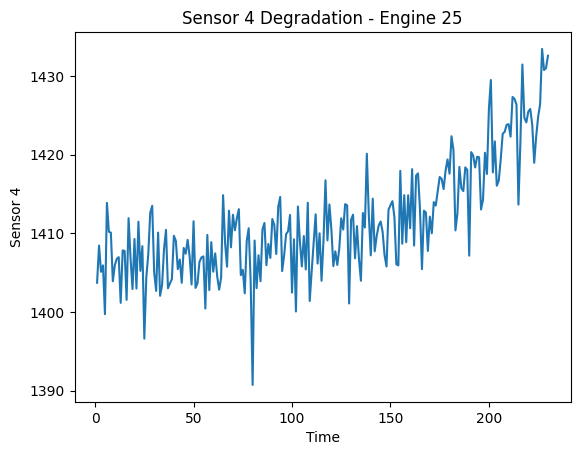

In [36]:
engine_sample = df[df['unit number'] == 25]

plt.plot(engine_sample["time"], engine_sample['sensor measurement 4'])
plt.xlabel("Time")
plt.ylabel("Sensor 4")
plt.title("Sensor 4 Degradation - Engine 25")
plt.show()

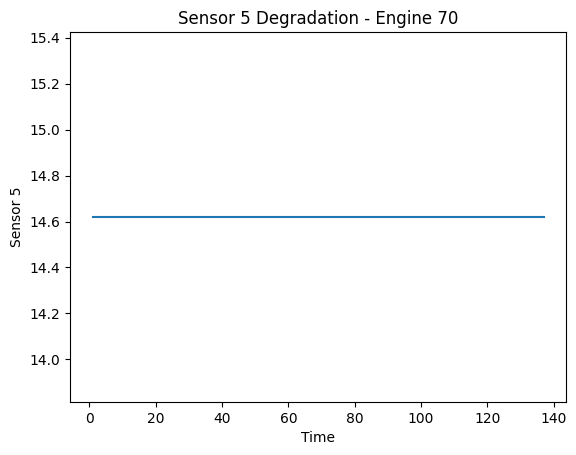

In [40]:
engine_sample = df[df['unit number'] == 70]

plt.plot(engine_sample["time"], engine_sample['sensor measurement 5'])
plt.xlabel("Time")
plt.ylabel("Sensor 5")
plt.title("Sensor 5 Degradation - Engine 70")
plt.show()

In [42]:
# finding sensors with near 0 variance that will be noisy
sensor_cols = [col for col in df.columns if "sensor" in col]

variances = df[sensor_cols].var().sort_values(ascending=True)

variances

,0
sensor measurement 19,0.000000e+00
sensor measurement 18,0.000000e+00
sensor measurement 16,2.422479e-28
sensor measurement 10,2.172333e-25
sensor measurement 5,1.152399e-23
sensor measurement 1,4.273435e-21
sensor measurement 6,1.929279e-06
sensor measurement 15,1.406628e-03
sensor measurement 8,5.038938e-03
sensor measurement 13,5.172330e-03


In [43]:
# drop certain sensors
sensors_to_drop = [
    'sensor measurement 19',
    'sensor measurement 18',
    'sensor measurement 16',
    'sensor measurement 10',
    'sensor measurement 5',
    'sensor measurement 1'
]
df = df.drop(columns=sensors_to_drop)

In [44]:
df

,unit number,time,operational setting 1,operational setting 2,operational setting 3,sensor measurement 2,sensor measurement 3,sensor measurement 4,sensor measurement 6,sensor measurement 7,...,sensor measurement 9,sensor measurement 11,sensor measurement 12,sensor measurement 13,sensor measurement 14,sensor measurement 15,sensor measurement 17,sensor measurement 20,sensor measurement 21,RUL
0,1,1,-0.0007,-0.0004,100.0,641.82,1589.70,1400.60,21.61,554.36,...,9046.19,47.47,521.66,2388.02,8138.62,8.4195,392,39.06,23.4190,191
1,1,2,0.0019,-0.0003,100.0,642.15,1591.82,1403.14,21.61,553.75,...,9044.07,47.49,522.28,2388.07,8131.49,8.4318,392,39.00,23.4236,190
2,1,3,-0.0043,0.0003,100.0,642.35,1587.99,1404.20,21.61,554.26,...,9052.94,47.27,522.42,2388.03,8133.23,8.4178,390,38.95,23.3442,189
3,1,4,0.0007,0.0000,100.0,642.35,1582.79,1401.87,21.61,554.45,...,9049.48,47.13,522.86,2388.08,8133.83,8.3682,392,38.88,23.3739,188
4,1,5,-0.0019,-0.0002,100.0,642.37,1582.85,1406.22,21.61,554.00,...,9055.15,47.28,522.19,2388.04,8133.80,8.4294,393,38.90,23.4044,187
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20626,100,196,-0.0004,-0.0003,100.0,643.49,1597.98,1428.63,21.61,551.43,...,9065.52,48.07,519.49,2388.26,8137.60,8.4956,397,38.49,22.9735,4
20627,100,197,-0.0016,-0.0005,100.0,643.54,1604.50,1433.58,21.61,550.86,...,9065.11,48.04,519.68,2388.22,8136.50,8.5139,395,38.30,23.1594,3
20628,100,198,0.0004,0.0000,100.0,643.42,1602.46,1428.18,21.61,550.94,...,9065.90,48.09,520.01,2388.24,8141.05,8.5646,398,38.44,22.9333,2
20629,100,199,-0.0011,0.0003,100.0,643.23,1605.26,1426.53,21.61,550.68,...,9073.72,48.39,519.67,2388.23,8139.29,8.5389,395,38.29,23.0640,1


In [46]:
# correlation of each columns to RUL
df.corr()["RUL"].sort_values()

,RUL
time,-0.736241
sensor measurement 11,-0.696228
sensor measurement 4,-0.678948
sensor measurement 15,-0.642667
sensor measurement 2,-0.606484
sensor measurement 17,-0.606154
sensor measurement 3,-0.584520
sensor measurement 8,-0.563968
sensor measurement 13,-0.562569
sensor measurement 9,-0.390102


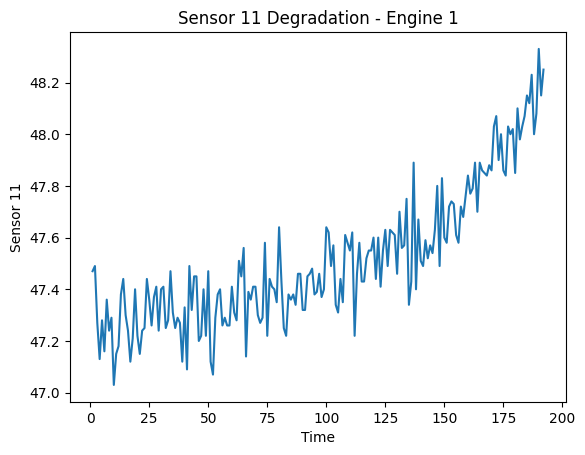

In [47]:
# choosing the strongest sensor and plotting it for different engines to inspect the patterns
engine_sample = df[df['unit number'] == 1]

plt.plot(engine_sample["time"], engine_sample['sensor measurement 11'])
plt.xlabel("Time")
plt.ylabel("Sensor 11")
plt.title("Sensor 11 Degradation - Engine 1")
plt.show()

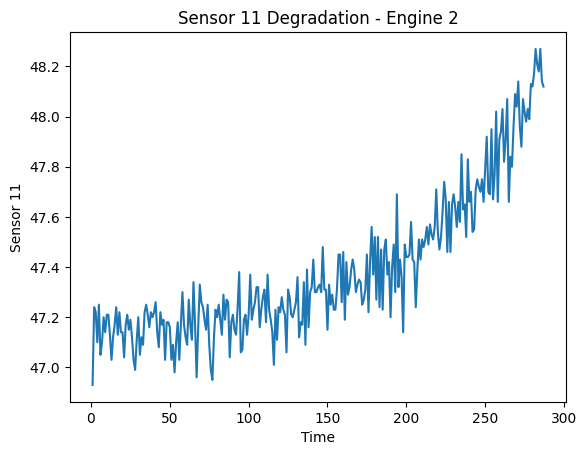

In [48]:
engine_sample = df[df['unit number'] == 2]

plt.plot(engine_sample["time"], engine_sample['sensor measurement 11'])
plt.xlabel("Time")
plt.ylabel("Sensor 11")
plt.title("Sensor 11 Degradation - Engine 2")
plt.show()

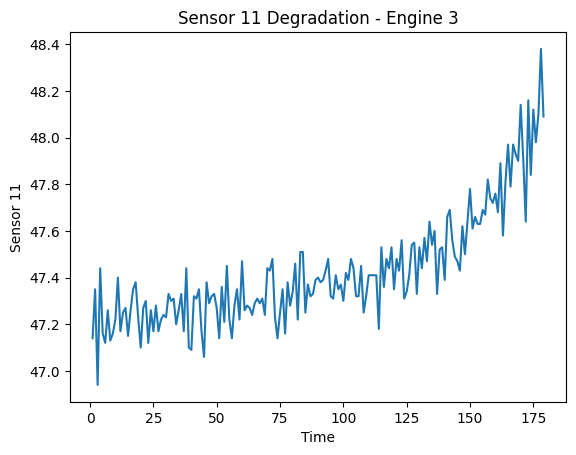

In [49]:
engine_sample = df[df['unit number'] == 3]

plt.plot(engine_sample["time"], engine_sample['sensor measurement 11'])
plt.xlabel("Time")
plt.ylabel("Sensor 11")
plt.title("Sensor 11 Degradation - Engine 3")
plt.show()

In [67]:
# feature engineering
# set window size and specify sensor columns
window_size = 30
sensor_cols = [col for col in df.columns if "sensor" in col]

# empty lists
feature_list = []
target_list = []


for id in df["unit number"].unique():
    engine_data = df[df["unit number"]==id].copy()
    engine_data = engine_data.sort_values("time")

    for i in range(window_size, len(engine_data)):

        window = engine_data.iloc[i-window_size:i]

        features = {}

        # Statistical features
        for col in sensor_cols:
           features[f"{col}_mean"] = window[col].mean()
           features[f"{col}_std"] = window[col].std()
           features[f"{col}_min"] = window[col].min()
           features[f"{col}_max"] = window[col].max()

           # Slope (linear trend)
           x = np.arange(window_size)
           y_for_slope = window[col].values
           slope = np.polyfit(x, y_for_slope, 1)[0]

           features[f"{col}_slope"] = slope

        feature_list.append(features)

        # Target RUL at current timestep
        target_list.append(engine_data.iloc[i]["RUL"])

# Convert to DataFrame
X = pd.DataFrame(feature_list)
y = np.array(target_list)


In [68]:
X.shape

(17631, 75)

In [69]:
y.shape

(17631,)

In [58]:
# load test data
test_df = pd.read_csv('/content/test_FD001.txt', sep=' ', header=None)
test_df

,0,1,2,3,4,5,6,7,8,9,...,18,19,20,21,22,23,24,25,26,27
0,1,1,0.0023,0.0003,100.0,518.67,643.02,1585.29,1398.21,14.62,...,8125.55,8.4052,0.03,392,2388,100.0,38.86,23.3735,NaN,NaN
1,1,2,-0.0027,-0.0003,100.0,518.67,641.71,1588.45,1395.42,14.62,...,8139.62,8.3803,0.03,393,2388,100.0,39.02,23.3916,NaN,NaN
2,1,3,0.0003,0.0001,100.0,518.67,642.46,1586.94,1401.34,14.62,...,8130.10,8.4441,0.03,393,2388,100.0,39.08,23.4166,NaN,NaN
3,1,4,0.0042,0.0000,100.0,518.67,642.44,1584.12,1406.42,14.62,...,8132.90,8.3917,0.03,391,2388,100.0,39.00,23.3737,NaN,NaN
4,1,5,0.0014,0.0000,100.0,518.67,642.51,1587.19,1401.92,14.62,...,8129.54,8.4031,0.03,390,2388,100.0,38.99,23.4130,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13091,100,194,0.0049,0.0000,100.0,518.67,643.24,1599.45,1415.79,14.62,...,8213.28,8.4715,0.03,394,2388,100.0,38.65,23.1974,NaN,NaN
13092,100,195,-0.0011,-0.0001,100.0,518.67,643.22,1595.69,1422.05,14.62,...,8210.85,8.4512,0.03,395,2388,100.0,38.57,23.2771,NaN,NaN
13093,100,196,-0.0006,-0.0003,100.0,518.67,643.44,1593.15,1406.82,14.62,...,8217.24,8.4569,0.03,395,2388,100.0,38.62,23.2051,NaN,NaN
13094,100,197,-0.0038,0.0001,100.0,518.67,643.26,1594.99,1419.36,14.62,...,8220.48,8.4711,0.03,395,2388,100.0,38.66,23.2699,NaN,NaN


In [59]:
# use the same preprocessing for test df
test_df.columns = columns
test_df = test_df.dropna(axis=1, how='all')
test_df = test_df.drop(columns=sensors_to_drop)
test_df

,unit number,time,operational setting 1,operational setting 2,operational setting 3,sensor measurement 2,sensor measurement 3,sensor measurement 4,sensor measurement 6,sensor measurement 7,sensor measurement 8,sensor measurement 9,sensor measurement 11,sensor measurement 12,sensor measurement 13,sensor measurement 14,sensor measurement 15,sensor measurement 17,sensor measurement 20,sensor measurement 21
0,1,1,0.0023,0.0003,100.0,643.02,1585.29,1398.21,21.61,553.90,2388.04,9050.17,47.20,521.72,2388.03,8125.55,8.4052,392,38.86,23.3735
1,1,2,-0.0027,-0.0003,100.0,641.71,1588.45,1395.42,21.61,554.85,2388.01,9054.42,47.50,522.16,2388.06,8139.62,8.3803,393,39.02,23.3916
2,1,3,0.0003,0.0001,100.0,642.46,1586.94,1401.34,21.61,554.11,2388.05,9056.96,47.50,521.97,2388.03,8130.10,8.4441,393,39.08,23.4166
3,1,4,0.0042,0.0000,100.0,642.44,1584.12,1406.42,21.61,554.07,2388.03,9045.29,47.28,521.38,2388.05,8132.90,8.3917,391,39.00,23.3737
4,1,5,0.0014,0.0000,100.0,642.51,1587.19,1401.92,21.61,554.16,2388.01,9044.55,47.31,522.15,2388.03,8129.54,8.4031,390,38.99,23.4130
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13091,100,194,0.0049,0.0000,100.0,643.24,1599.45,1415.79,21.61,553.41,2388.02,9142.37,47.69,520.69,2388.00,8213.28,8.4715,394,38.65,23.1974
13092,100,195,-0.0011,-0.0001,100.0,643.22,1595.69,1422.05,21.61,553.22,2388.05,9140.68,47.60,521.05,2388.09,8210.85,8.4512,395,38.57,23.2771
13093,100,196,-0.0006,-0.0003,100.0,643.44,1593.15,1406.82,21.61,553.04,2388.11,9146.81,47.57,521.18,2388.04,8217.24,8.4569,395,38.62,23.2051
13094,100,197,-0.0038,0.0001,100.0,643.26,1594.99,1419.36,21.61,553.37,2388.07,9148.85,47.61,521.33,2388.08,8220.48,8.4711,395,38.66,23.2699


In [62]:
# create test features
window_size = 30
sensor_cols = [col for col in test_df.columns if "sensor" in col]

X_test_list = []
engine_ids = test_df["unit number"].unique()

for engine_id in engine_ids:
    eng = test_df[test_df["unit number"] == engine_id].sort_values("time")

    # take last window_size cycles
    window = eng.iloc[-window_size:]

    feats = {}
    for col in sensor_cols:
        feats[f"{col}_mean"] = window[col].mean()
        feats[f"{col}_std"]  = window[col].std()
        feats[f"{col}_min"]  = window[col].min()
        feats[f"{col}_max"]  = window[col].max()
        x = np.arange(window_size)
        y = window[col].values
        feats[f"{col}_slope"] = np.polyfit(x, y, 1)[0]

    feats["unit number"] = engine_id
    X_test_list.append(feats)

X_test = pd.DataFrame(X_test_list).sort_values("unit number")
X_test.head()


,sensor measurement 2_mean,sensor measurement 2_std,sensor measurement 2_min,sensor measurement 2_max,sensor measurement 2_slope,sensor measurement 3_mean,sensor measurement 3_std,sensor measurement 3_min,sensor measurement 3_max,sensor measurement 3_slope,...,sensor measurement 20_std,sensor measurement 20_min,sensor measurement 20_max,sensor measurement 20_slope,sensor measurement 21_mean,sensor measurement 21_std,sensor measurement 21_min,sensor measurement 21_max,sensor measurement 21_slope,unit number
0,642.295667,0.274285,641.71,642.79,0.006463,1585.659667,3.744615,1579.12,1594.29,0.047037,...,0.097500,38.77,39.11,-0.003426,23.379283,0.035437,23.3186,23.4572,-0.000796,1
1,642.687000,0.269433,642.16,643.33,0.003050,1589.292000,4.119994,1581.85,1597.36,-0.030069,...,0.101325,38.67,39.03,-0.001737,23.298623,0.046085,23.2196,23.3836,-0.000657,2
2,642.884000,0.285495,642.44,643.39,0.004970,1592.125333,3.997414,1582.46,1600.07,0.071048,...,0.131946,38.56,39.07,-0.004129,23.245247,0.048838,23.1414,23.3559,-0.000203,3
3,642.735667,0.299824,641.88,643.25,0.007780,1591.336333,3.382004,1583.03,1595.46,0.019900,...,0.095053,38.58,38.98,-0.003335,23.285030,0.053722,23.1676,23.3769,-0.002506,4
4,642.642667,0.283110,642.02,643.22,0.005477,1590.578667,3.615435,1584.23,1596.86,0.020000,...,0.092749,38.64,38.98,0.000298,23.267480,0.062431,23.1476,23.4117,-0.000881,5


In [60]:
# load file with target numbers
truth_df = pd.read_csv('/content/RUL_FD001.txt', sep=' ', header=None).dropna(axis=1, how="all")
truth_df.columns = ["RUL_true"]
truth_df.head()

,RUL_true
0,112
1,98
2,69
3,82
4,91


In [61]:
# this need the unit number to be attached
truth_df["unit number"] = truth_df.index + 1
truth_df.head()

,RUL_true,unit number
0,112,1
1,98,2
2,69,3
3,82,4
4,91,5


In [63]:
test_eval = X_test.merge(truth_df, on="unit number", how="left")
y_test = test_eval["RUL_true"].values
X_test_final = test_eval.drop(columns=["unit number", "RUL_true"])

In [70]:
# random forest
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.preprocessing import StandardScaler

# specify model
rf = RandomForestRegressor(
    n_estimators=300,
    random_state=42,
    n_jobs=-1
)

# scale
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X)
X_test_scaled = scaler.transform(X_test_final)

# train
rf.fit(X_train_scaled, y)

# predict
y_pred = rf.predict(X_test_scaled)

mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print("MAE:", mae)
print("RMSE:", rmse)


MAE: 15.086666666666668
RMSE: 21.506235018400282


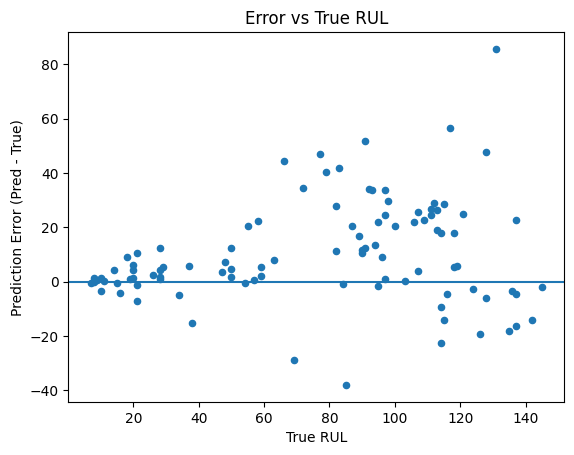

In [72]:
# scatter plot to show the errors
errors = y_pred - y_test

plt.scatter(y_test, errors, s=20)
plt.axhline(0)
plt.xlabel("True RUL")
plt.ylabel("Prediction Error (Pred - True)")
plt.title("Error vs True RUL")
plt.show()


In [86]:
# trying the xgboost regressor
xgb = XGBRegressor(
    n_estimators=500,
    learning_rate=0.05,
    max_depth=6,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42,
    n_jobs=-1
)

xgb.fit(X_train_scaled, y)

y_pred_xgb = xgb.predict(X_test_scaled)

mae_xgb = mean_absolute_error(y_test, y_pred_xgb)
rmse_xgb = np.sqrt(mean_squared_error(y_test, y_pred_xgb))

print("XGBoost MAE:", mae_xgb)
print("XGBoost RMSE:", rmse_xgb)

XGBoost MAE: 16.160127639770508
XGBoost RMSE: 21.224067212783094


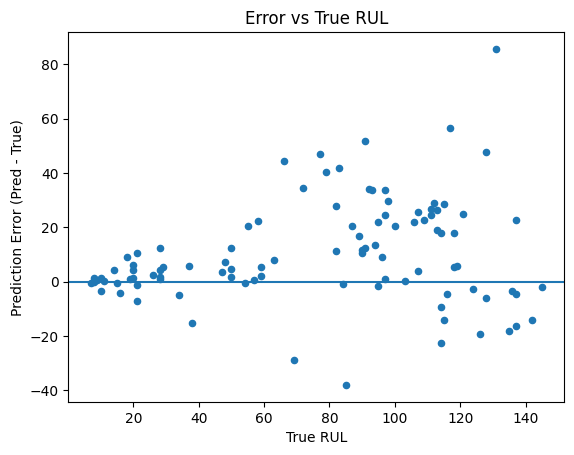

In [87]:
# scatter plot to show the errors
xgb_errors = y_pred_xgb - y_test

plt.scatter(y_test, errors, s=20)
plt.axhline(0)
plt.xlabel("True RUL")
plt.ylabel("Prediction Error (Pred - True)")
plt.title("Error vs True RUL")
plt.show()

In [88]:
# messing around with the model features

xgb = XGBRegressor(
    n_estimators=500,
    learning_rate=0.01,
    max_depth=6,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42,
    n_jobs=-1
)

xgb.fit(X_train_scaled, y)

y_pred_xgb = xgb.predict(X_test_scaled)

mae_xgb = mean_absolute_error(y_test, y_pred_xgb)
rmse_xgb = np.sqrt(mean_squared_error(y_test, y_pred_xgb))

print("XGBoost MAE:", mae_xgb)
print("XGBoost RMSE:", rmse_xgb)

XGBoost MAE: 15.790092468261719
XGBoost RMSE: 20.982727940526985


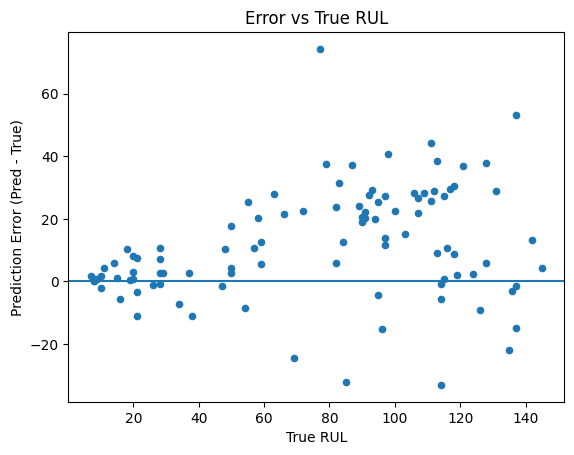

In [89]:
# scatter plot to show the errors
errors = y_pred_xgb - y_test

plt.scatter(y_test, errors, s=20)
plt.axhline(0)
plt.xlabel("True RUL")
plt.ylabel("Prediction Error (Pred - True)")
plt.title("Error vs True RUL")
plt.show()


In [94]:
# decreasing the learning rate further
xgb = XGBRegressor(
    n_estimators=500,
    learning_rate=0.005,
    max_depth=6,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42,
    n_jobs=-1
)

xgb.fit(X_train_scaled, y)

y_pred_xgb = xgb.predict(X_test_scaled)

mae_xgb = mean_absolute_error(y_test, y_pred_xgb)
rmse_xgb = np.sqrt(mean_squared_error(y_test, y_pred_xgb))

print("XGBoost MAE:", mae_xgb)
print("XGBoost RMSE:", rmse_xgb)

XGBoost MAE: 15.93178939819336
XGBoost RMSE: 19.886818113211795


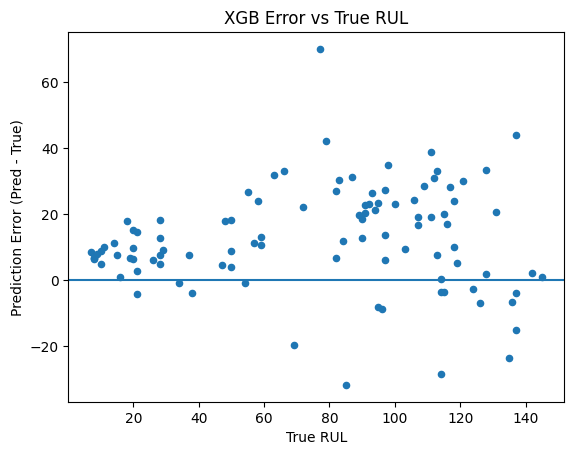

In [96]:
# scatter plot to show the errors
errors = y_pred_xgb - y_test

plt.scatter(y_test, errors, s=20)
plt.axhline(0)
plt.xlabel("True RUL")
plt.ylabel("Prediction Error (Pred - True)")
plt.title("XGB Error vs True RUL")
plt.show()


In [92]:
# decreasing the learning rate further
xgb = XGBRegressor(
    n_estimators=1500,
    learning_rate=0.005,
    max_depth=6,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42,
    n_jobs=-1
)

xgb.fit(X_train_scaled, y)

y_pred_xgb = xgb.predict(X_test_scaled)

mae_xgb = mean_absolute_error(y_test, y_pred_xgb)
rmse_xgb = np.sqrt(mean_squared_error(y_test, y_pred_xgb))

print("XGBoost MAE:", mae_xgb)
print("XGBoost RMSE:", rmse_xgb)

XGBoost MAE: 15.917603492736816
XGBoost RMSE: 21.272091142439795


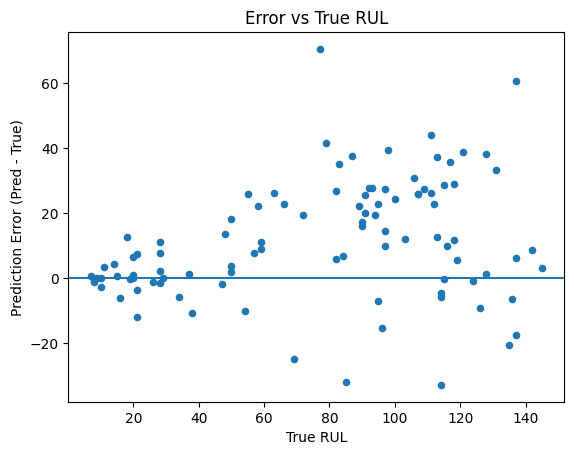

In [93]:
# scatter plot to show the errors
errors = y_pred_xgb - y_test

plt.scatter(y_test, errors, s=20)
plt.axhline(0)
plt.xlabel("True RUL")
plt.ylabel("Prediction Error (Pred - True)")
plt.title("Error vs True RUL")
plt.show()


In [101]:
# set a rul cap so the predictions closer to engine failure are more concentrated on
rul_cap = 125

y_train_capped = np.clip(y, 0, rul_cap)
y_test_capped = np.clip(y_test, 0, rul_cap)

In [102]:
# retrain random forest with the cap
rf.fit(X_train_scaled, y_train_capped)

y_pred_rf_cap = rf.predict(X_test_scaled)

mae_rf_cap = mean_absolute_error(y_test_capped, y_pred_rf_cap)
rmse_rf_cap = np.sqrt(mean_squared_error(y_test_capped, y_pred_rf_cap))

print("RF Capped MAE:", mae_rf_cap)
print("RF Capped RMSE:", rmse_rf_cap)

RF Capped MAE: 8.669966666666667
RF Capped RMSE: 12.778356375788972


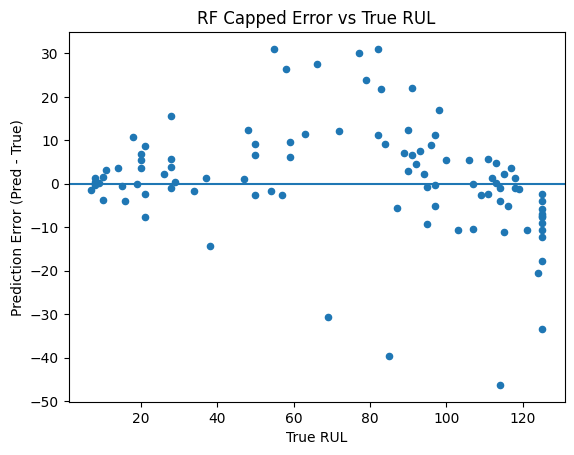

In [103]:
# scatter plot for rf capped
errors_rf_cap = y_pred_rf_cap - y_test_capped

plt.scatter(y_test_capped, errors_rf_cap, s=20)
plt.axhline(0)
plt.xlabel("True RUL")
plt.ylabel("Prediction Error (Pred - True)")
plt.title("RF Capped Error vs True RUL")
plt.show()

In [107]:
# LSTM
# keep the same window size and cap
window_size = 30
cap = 125

# Using the same sensor columns, using raw data not the engineered one
sensor_cols = [c for c in df.columns if "sensor" in c]

X_seq_train = []
y_seq_train = []


for id in df["unit number"].unique():
    eng = df[df["unit number"] == id].sort_values("time")

    # cap RUL
    rul_vals = np.clip(eng["RUL"].values, 0, cap)
    sensor_vals = eng[sensor_cols].values

    for i in range(window_size, len(eng)):
        X_seq_train.append(sensor_vals[i-window_size:i, :])
        y_seq_train.append(rul_vals[i])

X_seq_train = np.array(X_seq_train)
y_seq_train = np.array(y_seq_train)

print("X_seq_train:", X_seq_train.shape)
print("y_seq_train:", y_seq_train.shape)

X_seq_train: (17631, 30, 15)
y_seq_train: (17631,)


In [110]:
# cap the true RUL
rul_true_capped = truth_df.copy()
rul_true_capped["RUL_true"] = np.clip(rul_true_capped["RUL_true"].values, 0, cap)

X_seq_test = []
y_seq_test = []

for id in test_df["unit number"].unique():
    eng = test_df[test_df["unit number"] == id].sort_values("time")

    sensor_vals = eng[sensor_cols].values
    last_window = sensor_vals[-window_size:, :]
    X_seq_test.append(last_window)

    y_val = rul_true_capped.loc[rul_true_capped["unit number"] == id, "RUL_true"].values[0]
    y_seq_test.append(y_val)

X_seq_test = np.array(X_seq_test)
y_seq_test = np.array(y_seq_test)

print("X_seq_test:", X_seq_test.shape)
print("y_seq_test:", y_seq_test.shape)


X_seq_test: (100, 30, 15)
y_seq_test: (100,)


In [111]:
# scale values, standers scaler already defined
# reshape to 2D
train_2d = X_seq_train.reshape(-1, X_seq_train.shape[-1])
test_2d = X_seq_test.reshape(-1, X_seq_test.shape[-1])

train_2d_scaled = scaler.fit_transform(train_2d)
test_2d_scaled = scaler.transform(test_2d)

X_seq_train_scaled = train_2d_scaled.reshape(X_seq_train.shape)
X_seq_test_scaled = test_2d_scaled.reshape(X_seq_test.shape)


In [112]:
# build LSTM

# set random seed
tf.random.set_seed(42)

# model, use dropouts to prevent overfitting
model = models.Sequential([
    layers.Input(shape=(window_size, X_seq_train_scaled.shape[-1])),
    layers.LSTM(64, return_sequences=False),
    layers.Dropout(0.2),
    layers.Dense(32, activation="relu"),
    layers.Dense(1)
])

model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3),
    loss="mse",
    metrics=[tf.keras.metrics.MeanAbsoluteError()]
)

model.summary()


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 64)             │        20,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 22,593 (88.25 KB)

 Trainable params: 22,593 (88.25 KB)

 Non-trainable params: 0 (0.00 B)

In [113]:
# use early stopping to avoid overfitting
early_stop = tf.keras.callbacks.EarlyStopping(
    monitor="val_loss",
    patience=10,
    restore_best_weights=True
)

#fit model
history = model.fit(
    X_seq_train_scaled, y_seq_train,
    validation_split=0.2,
    epochs=30,
    batch_size=128,
    callbacks=[early_stop],
    verbose=1
)


Epoch 1/30
111/111 ━━━━━━━━━━━━━━━━━━━━ 8s 46ms/step - loss: 7233.8765 - mean_absolute_error: 74.5076 - val_loss: 3087.3635 - val_mean_absolute_error: 46.6916
Epoch 2/30
111/111 ━━━━━━━━━━━━━━━━━━━━ 6s 51ms/step - loss: 1815.7092 - mean_absolute_error: 34.3223 - val_loss: 560.3376 - val_mean_absolute_error: 20.2497
Epoch 3/30
111/111 ━━━━━━━━━━━━━━━━━━━━ 5s 45ms/step - loss: 421.8849 - mean_absolute_error: 16.6373 - val_loss: 349.5927 - val_mean_absolute_error: 15.5279
Epoch 4/30
111/111 ━━━━━━━━━━━━━━━━━━━━ 5s 44ms/step - loss: 301.5357 - mean_absolute_error: 13.5868 - val_loss: 296.5950 - val_mean_absolute_error: 13.3787
Epoch 5/30
111/111 ━━━━━━━━━━━━━━━━━━━━ 6s 54ms/step - loss: 249.8853 - mean_absolute_error: 11.9892 - val_loss: 279.8311 - val_mean_absolute_error: 12.7529
Epoch 6/30
111/111 ━━━━━━━━━━━━━━━━━━━━ 5s 43ms/step - loss: 225.5756 - mean_absolute_error: 11.2114 - val_loss: 263.8201 - val_mean_absolute_error: 12.0459
Epoch 7/30
111/111 ━━━━━━━━━━━━━━━━━━━━ 6s 54ms/step - 

In [114]:
# evaluate the model
y_pred_lstm = model.predict(X_seq_test_scaled).ravel()

mae_lstm = mean_absolute_error(y_seq_test, y_pred_lstm)
rmse_lstm = np.sqrt(mean_squared_error(y_seq_test, y_pred_lstm))

print("LSTM MAE:", mae_lstm)
print("LSTM RMSE:", rmse_lstm)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step
LSTM MAE: 9.536879539489746
LSTM RMSE: 13.0004366287853


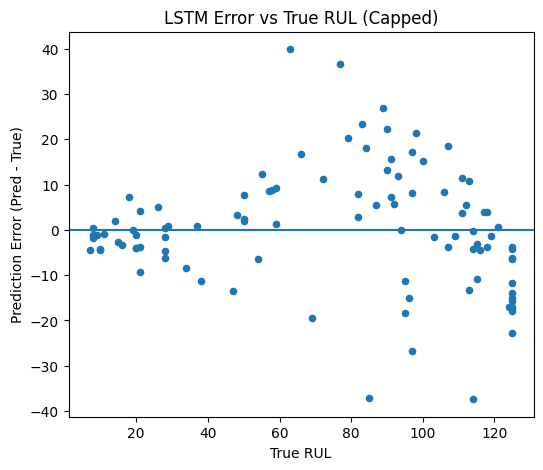

In [115]:
# plot an errors graph for LSTM
errors_lstm = y_pred_lstm - y_seq_test

plt.figure(figsize=(6,5))
plt.scatter(y_seq_test, errors_lstm, s=20)
plt.axhline(0)
plt.xlabel("True RUL")
plt.ylabel("Prediction Error (Pred - True)")
plt.title("LSTM Error vs True RUL (Capped)")
plt.show()


In [117]:
#BiLSTM
tf.random.set_seed(42)

model = models.Sequential([
    layers.Input(shape=(window_size, X_seq_train_scaled.shape[-1])),
    layers.Bidirectional(layers.LSTM(64, return_sequences=True)),
    layers.Dropout(0.2),
    layers.LSTM(32),
    layers.Dropout(0.2),
    layers.Dense(32, activation="relu"),
    layers.Dense(1)
])

model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=5e-4),
    loss=tf.keras.losses.Huber(delta=10.0),
    metrics=[tf.keras.metrics.MeanAbsoluteError()]
)


In [118]:
# train
# use early stopping to avoid overfitting
early_stop = tf.keras.callbacks.EarlyStopping(
    monitor="val_loss",
    patience=5,
    restore_best_weights=True
)

#fit model
history = model.fit(
    X_seq_train_scaled, y_seq_train,
    validation_split=0.2,
    epochs=30,
    batch_size=128,
    callbacks=[early_stop],
    verbose=1
)

Epoch 1/30
111/111 ━━━━━━━━━━━━━━━━━━━━ 20s 126ms/step - loss: 725.9990 - mean_absolute_error: 77.4436 - val_loss: 655.4863 - val_mean_absolute_error: 70.3662
Epoch 2/30
111/111 ━━━━━━━━━━━━━━━━━━━━ 13s 119ms/step - loss: 561.8431 - mean_absolute_error: 60.9692 - val_loss: 440.9480 - val_mean_absolute_error: 48.7672
Epoch 3/30
111/111 ━━━━━━━━━━━━━━━━━━━━ 13s 118ms/step - loss: 355.3006 - mean_absolute_error: 40.0335 - val_loss: 259.7837 - val_mean_absolute_error: 30.4724
Epoch 4/30
111/111 ━━━━━━━━━━━━━━━━━━━━ 22s 132ms/step - loss: 197.3352 - mean_absolute_error: 24.0719 - val_loss: 150.8610 - val_mean_absolute_error: 19.4297
Epoch 5/30
111/111 ━━━━━━━━━━━━━━━━━━━━ 13s 119ms/step - loss: 114.2990 - mean_absolute_error: 15.6412 - val_loss: 91.1272 - val_mean_absolute_error: 13.4370
Epoch 6/30
111/111 ━━━━━━━━━━━━━━━━━━━━ 14s 124ms/step - loss: 87.2428 - mean_absolute_error: 12.7089 - val_loss: 78.1580 - val_mean_absolute_error: 11.9456
Epoch 7/30
111/111 ━━━━━━━━━━━━━━━━━━━━ 13s 119ms

In [119]:
# evaluate the model
y_pred_bilstm = model.predict(X_seq_test_scaled).ravel()

mae_bilstm = mean_absolute_error(y_seq_test, y_pred_bilstm)
rmse_bilstm = np.sqrt(mean_squared_error(y_seq_test, y_pred_bilstm))

print("LSTM MAE:", mae_bilstm)
print("LSTM RMSE:", rmse_bilstm)

4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 178ms/step
LSTM MAE: 9.113097190856934
LSTM RMSE: 13.047537525281651


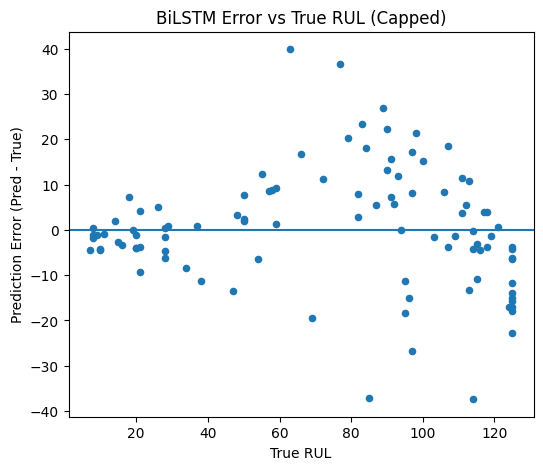

In [120]:
# plot an errors graph for BiLSTM
errors_bilstm = y_pred_bilstm - y_seq_test

plt.figure(figsize=(6,5))
plt.scatter(y_seq_test, errors_lstm, s=20)
plt.axhline(0)
plt.xlabel("True RUL")
plt.ylabel("Prediction Error (Pred - True)")
plt.title("BiLSTM Error vs True RUL (Capped)")
plt.show()